### 下面用MNIST举例，讲解深度神经网络

In [1]:
import numpy as np
import torch
from torchvision.datasets import mnist     # 导入pytorch内置的mnist数据

from torch import nn
from torch.autograd import Variable

In [ ]:
# 使用内置函数下载mnist数据集
train_set = mnist.MNIST('data/MNIST', train=True, download=True)
test_set = mnist.MNIST('data/MNIST/', train=False, download=True)

In [ ]:
## 看看其中的数据是什么样子的
a_data, a_label = train_set[0]
print("a_data:{}, a_label:{}".format(a_data, a_label))

In [ ]:
a_data

In [ ]:
# 这里的读入的数据是PIL库中的格式，我们可以非常方便将其转换为numpy array
a_data = np.array(a_data, dtype='float32')
print(a_data.shape)

In [2]:
# 对于神经网络，我们第一层的输入就是 28 x 28 = 784，所以必须将得到的数据我们做一个变换，使用 reshape 将他们拉平成一个一维向量
def data_tf(x):
    x = np.array(x, dtype='float32') / 255
    x = (x-0.5) / 0.5  # 标准化
    x = x.reshape((-1,))   # 拉平
    x = torch.from_numpy(x)
    return x
    
train_set = mnist.MNIST('data/',train=True, transform=data_tf, download=True)    # 重新载入数据集， 申明定义数据变换
test_set = mnist.MNIST('data/', train=False, transform=data_tf, download=True)

In [3]:
a, a_label = train_set[0]
print(a.shape,"\t",a_label)

torch.Size([784]) 	 5


In [4]:
from torch.utils.data import DataLoader
# 使用pytorch自带的DataLoader定义一个数据迭代器
# 
train_data = DataLoader(train_set, batch_size=64, shuffle=True)
test_data = DataLoader(test_set, batch_size=128, shuffle=False)

#使用这样的数据迭代器是非常有必要的，如果数据量太大，就无法一次将他们全部读入内存，所以需要使用 python 迭代器，每次生成一个批次的数据
a, a_label = next(iter(train_data))

#打印出一个批次的数据大小
print(a.shape,"\t", a_label.shape)

torch.Size([64, 784]) 	 torch.Size([64])


In [5]:
# 使用Sequential定义 4 层神经网络
net = nn.Sequential(
    nn.Linear(784, 400),
    nn.ReLU(),
    nn.Linear(400, 200),
    nn.ReLU(),
    nn.Linear(200, 100),
    nn.ReLU(),
    nn.Linear(100, 10)
)

# 定义 loss 函数
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=1e-1, momentum=0.9)


In [6]:
# 开始训练
losses = []
acces = []
eval_losses = []
eval_acces = []

for e in range(20):
    train_loss = 0
    train_acc = 0
    net.train()
    for im, label in train_data:
        im = Variable(im)
        label = Variable(label)
        # 前向传播
        out = net(im)
        loss = criterion(out, label)
        # 反向传播
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # 记录误差
        train_loss += loss.item()
        # 计算分类的准确率
        _, pred = out.max(1)
        num_correct = (pred == label).sum().item()
        acc = num_correct / im.shape[0]
        train_acc += acc
        
    losses.append(train_loss / len(train_data))
    acces.append(train_acc / len(train_data))
    # 在测试集上检验效果
    eval_loss = 0
    eval_acc = 0
    net.eval() # 将模型改为预测模式
    for im, label in test_data:
        im = Variable(im)
        label = Variable(label)
        out = net(im)
        loss = criterion(out, label)
        # 记录误差
        eval_loss += loss.item()
        # 记录准确率
        _, pred = out.max(1)
        num_correct = (pred == label).sum().item()
        acc = num_correct / im.shape[0]
        eval_acc += acc
        
    eval_losses.append(eval_loss / len(test_data))
    eval_acces.append(eval_acc / len(test_data))
    print('epoch: {}, Train Loss: {:.6f}, Train Acc: {:.6f}, Eval Loss: {:.6f}, Eval Acc: {:.6f}'
          .format(e, train_loss / len(train_data), train_acc / len(train_data), 
                     eval_loss / len(test_data), eval_acc / len(test_data)))

epoch: 0, Train Loss: 0.699141, Train Acc: 0.794176, Eval Loss: 0.581313, Eval Acc: 0.851464
epoch: 1, Train Loss: 0.413042, Train Acc: 0.895439, Eval Loss: 0.399277, Eval Acc: 0.908821
epoch: 2, Train Loss: 0.401034, Train Acc: 0.898954, Eval Loss: 0.385868, Eval Acc: 0.913271
epoch: 3, Train Loss: 0.357731, Train Acc: 0.912763, Eval Loss: 0.373002, Eval Acc: 0.912579
epoch: 4, Train Loss: 0.362629, Train Acc: 0.911497, Eval Loss: 0.321500, Eval Acc: 0.920095
epoch: 5, Train Loss: 0.335771, Train Acc: 0.917711, Eval Loss: 0.389512, Eval Acc: 0.893394
epoch: 6, Train Loss: 0.336271, Train Acc: 0.920376, Eval Loss: 0.355984, Eval Acc: 0.910700
epoch: 7, Train Loss: 0.321090, Train Acc: 0.923291, Eval Loss: 0.378458, Eval Acc: 0.912876
epoch: 8, Train Loss: 0.306310, Train Acc: 0.926656, Eval Loss: 0.387091, Eval Acc: 0.910700
epoch: 9, Train Loss: 0.291070, Train Acc: 0.929921, Eval Loss: 0.324787, Eval Acc: 0.932456
epoch: 10, Train Loss: 0.340289, Train Acc: 0.919493, Eval Loss: 0.364

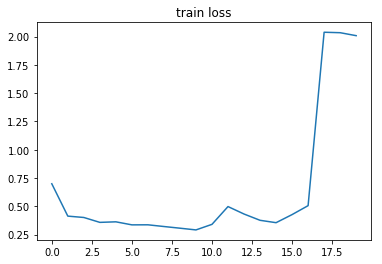

In [7]:
# 画出loss 曲线和准确率曲线
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('train loss')
plt.plot(np.arange(len(losses)), losses)

Text(0.5,1,'train acc')

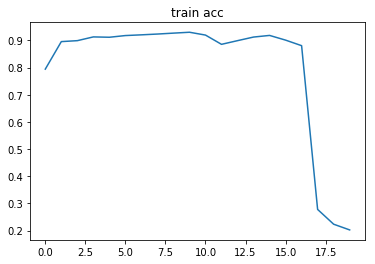

In [8]:
plt.plot(np.arange(len(acces)), acces)
plt.title('train acc')

Text(0.5,1,'test loss')

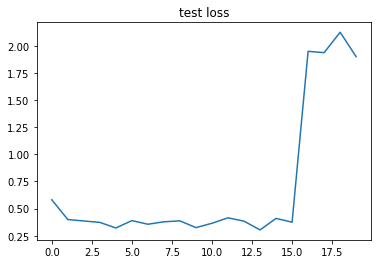

In [9]:
plt.plot(np.arange(len(eval_losses)), eval_losses)
plt.title('test loss')

Text(0.5,1,'test acc')

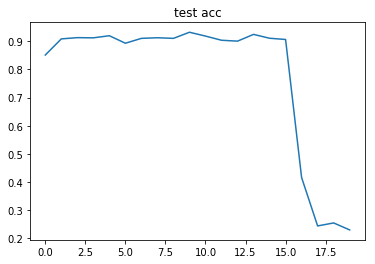

In [10]:
plt.plot(np.arange(len(eval_acces)), eval_acces)
plt.title('test acc')

# 多层全连接神经网络实现MNIST手写数字识别

In [11]:
# 定义简单的三层全连接神经网络
class simpleNet(nn.Module):
    def __init__(self, in_dim, n_hidden_1, n_hidden_2, out_dim):
        super(simpleNet, self).__init__()
        self.layer1 = nn.Linear(in_dim, n_hidden_1)
        self.layer2 = nn.Linear(n_hidden_1, n_hidden_2)
        self.layer3 = nn.Linear(n_hidden_2, out_dim)
        
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        return x

In [28]:
# 改进以下simpleNet ， 添加激活函数增加网络的非线性
class Activation_Net(nn.Module):
    def __init__(self, in_dim, n_hidden_1, n_hidden_2, out_dim):
        super(Activation_Net, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Linear(in_dim, n_hidden_1), nn.ReLU(True))
        self.layer2 = nn.Sequential(
            nn.Linear(n_hidden_1, n_hidden_2), nn.ReLU(True))
        self.layer3 = nn.Sequential(
            nn.Linear(n_hidden_2, out_dim))
        
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        return x

In [29]:
# 改进Activation_Net   添加批标准化
class Batch_Net(nn.Module):
    def __init__(self, in_dim, n_hidden_1, n_hidden_2, out_dim):
        super(Batch_Net, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Linear(in_dim, n_hidden_1), nn.BatchNorm1d(n_hidden_1), nn.ReLU(True))
        self.layer2 = nn.Sequential(
            nn.Linear(n_hidden_1, n_hidden_2), nn.BatchNorm1d(n_hidden_2), nn.ReLU(True))
        self.layer3 = nn.Sequential(
            nn.Linear(n_hidden_2, out_dim))
        
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        return x

In [15]:
# 训练网络，  导入相关包
import torch
from torch import nn, optim
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


# 超参数
batch_size = 64
learning_rate = 1e-2
num_epoches = 20

# 数据增强
data_tf = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize([0.5],[0.5])])  # Compose()将各种预处理操作组合在一起，Normalize（[0.5,0.5]）表示减去0.5再除以0.5  这样图片转化到了 -1~1 之间


In [16]:
# 下载训练集MNIST手写数字训练集
train_dataset = datasets.MNIST(root='data/', train=True, transform=data_tf, download=True)
test_dataset = datasets.MNIST(root='data/', train=False, transform=data_tf, download=True)
# 使用pytorch自带的DataLoader 定义一个数据迭代器
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [17]:
# 接入网络，定义损失函数和方法
model = simpleNet(28*28, 300, 100, 10)
if torch.cuda.is_available():
    model = model.cuda()

# 定义损失函数 和 优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [22]:
# 训练网络
losses = []
acces = []
eval_losses = []
eval_acces = []
n_epoch = 20

for epoch in range(n_epoch):
    train_loss = 0
    train_acc = 0
    model.train()
    for data in train_loader:
        img, label = data
        img = img.view(img.size(0), -1)
        if torch.cuda.is_available():
            img = Variable(img).cuda()   # volatile 默认为false  表示推理模式  如果某一个variable的volatile属性被设为True，那么所有依赖它的节点volatile属性都为True。volatile属性为True的节点不会求导，volatile的优先级比requires_grad高。
            label = Variable(label).cuda()
        else:
            img = Variable(img)
            label = Variable(label)
        
        out = model(img)   # 前向传播
        loss = criterion(out, label)   # 计算loss
        
        optimizer.zero_grad()   # 反向传播
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()   # 记录误差
        _, pred = out.max(1)    #  返回每一行中最大值的那个元素，且返回其索引（返回最大元素在这一行的列索引） 参考https://blog.csdn.net/liuweiyuxiang/article/details/84668269
        num_correct = (pred == label).sum().item()  # 每一次batch_size正确的个数
        acc = num_correct / img.shape[0]
        train_acc += acc
#         train_acc += num_correct
        
    losses.append(train_loss / len(train_loader))
    acces.append(train_acc / len(train_loader))
    
    # 在测试集检验效果
    eval_loss = 0
    eval_acc = 0
    model.eval()
    for data in test_loader:
        img, label = data
        img = img.view(img.size(0), -1)
        if torch.cuda.is_available():
            img = Variable(img, volatile=True).cuda()
            label = Variable(label, volatile=True).cuda()
        else:
            img = Variable(img, volatile=True)
            label = Variable(label, volatile=True)
        # 前向传播
        out = model(img)
        loss = criterion(out, label)   # 计算损失
        eval_loss += loss.item() 
        _, pred = out.max(1)
        num_correct = (pred == label).sum().item()
        acc = num_correct / img.shape[0]
        eval_acc += acc
#         eval_acc += num_correct
        
    eval_losses.append(eval_loss / len(test_data))
    eval_acces.append(eval_acc / len(test_data))    
    print('epoch: {}, Train Loss: {:.6f}, Train Acc: {:.6f}, Eval Loss: {:.6f}, Eval Acc: {:.6f}'
          .format(epoch, train_loss / len(train_loader), train_acc / len(train_loader), 
                     eval_loss / len(test_loader), eval_acc / len(test_loader)))

D:\software\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
D:\software\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.


epoch: 0, Train Loss: 0.258387, Train Acc: 0.928238, Eval Loss: 0.276330, Eval Acc: 0.922074
epoch: 1, Train Loss: 0.258261, Train Acc: 0.928755, Eval Loss: 0.275427, Eval Acc: 0.924264
epoch: 2, Train Loss: 0.257798, Train Acc: 0.928072, Eval Loss: 0.274397, Eval Acc: 0.923865
epoch: 3, Train Loss: 0.257445, Train Acc: 0.929005, Eval Loss: 0.279780, Eval Acc: 0.923169
epoch: 4, Train Loss: 0.257058, Train Acc: 0.927805, Eval Loss: 0.277116, Eval Acc: 0.921775
epoch: 5, Train Loss: 0.255906, Train Acc: 0.928455, Eval Loss: 0.277371, Eval Acc: 0.921178
epoch: 6, Train Loss: 0.256636, Train Acc: 0.927905, Eval Loss: 0.276716, Eval Acc: 0.921676
epoch: 7, Train Loss: 0.255472, Train Acc: 0.929138, Eval Loss: 0.272088, Eval Acc: 0.922273
epoch: 8, Train Loss: 0.255903, Train Acc: 0.929021, Eval Loss: 0.269918, Eval Acc: 0.925259
epoch: 9, Train Loss: 0.254921, Train Acc: 0.929104, Eval Loss: 0.271118, Eval Acc: 0.922174
epoch: 10, Train Loss: 0.254601, Train Acc: 0.928721, Eval Loss: 0.274

**画出loss曲线和准确率曲线**

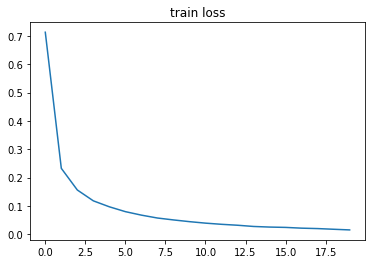

In [40]:
plt.title('train loss')
plt.plot(np.arange(len(losses)), losses)

Text(0.5,1,'train acc')

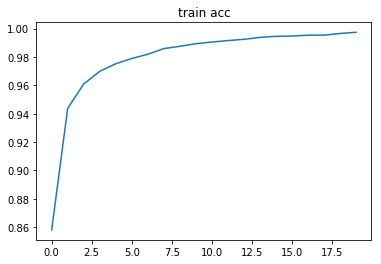

In [41]:
plt.plot(np.arange(len(acces)), acces)
plt.title('train acc')

Text(0.5,1,'test loss')

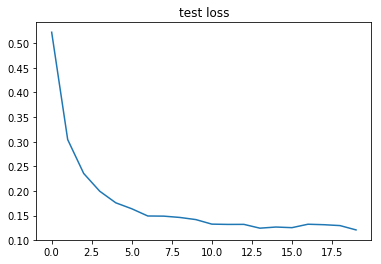

In [42]:
plt.plot(np.arange(len(eval_losses)), eval_losses)
plt.title('test loss')

Text(0.5,1,'test acc')

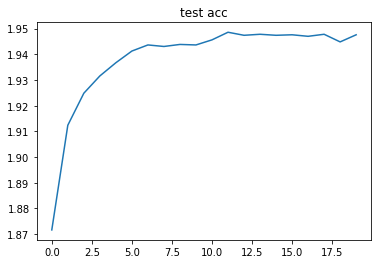

In [43]:
plt.plot(np.arange(len(eval_acces)), eval_acces)
plt.title('test acc')

### simpleNet 准确率大概在 92+%
### Activation_Net准确率大概在96+%    说明添加非激活函数 能增强准确率  相比上面增长4个百分点
### Batch_Net准确率大概在 98+%  说明添加BatchNormalization能增加准确率      相比上面增长2个百分点

In [39]:
# 接入网络，定义损失函数和方法
model = Batch_Net(28*28, 300, 100, 10)
if torch.cuda.is_available():
    model = model.cuda()

# 定义损失函数 和 优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# 训练网络
losses = []
acces = []
eval_losses = []
eval_acces = []
n_epoch = 20

for epoch in range(n_epoch):
    train_loss = 0
    train_acc = 0
    model.train()
    for data in train_loader:
        img, label = data
        img = img.view(img.size(0), -1)
        if torch.cuda.is_available():
            img = Variable(img).cuda()   # volatile 默认为false  表示推理模式  如果某一个variable的volatile属性被设为True，那么所有依赖它的节点volatile属性都为True。volatile属性为True的节点不会求导，volatile的优先级比requires_grad高。
            label = Variable(label).cuda()
        else:
            img = Variable(img)
            label = Variable(label)
        
        out = model(img)   # 前向传播
        loss = criterion(out, label)   # 计算loss
        
        optimizer.zero_grad()   # 反向传播
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()   # 记录误差
        _, pred = out.max(1)    #  返回每一行中最大值的那个元素，且返回其索引（返回最大元素在这一行的列索引） 参考https://blog.csdn.net/liuweiyuxiang/article/details/84668269
        num_correct = (pred == label).sum().item()  # 每一次batch_size正确的个数
        acc = num_correct / img.shape[0]
        train_acc += acc
#         train_acc += num_correct
        
    losses.append(train_loss / len(train_loader))
    acces.append(train_acc / len(train_loader))
    
    # 在测试集检验效果
    eval_loss = 0
    eval_acc = 0
    model.eval()
    for data in test_loader:
        img, label = data
        img = img.view(img.size(0), -1)
        if torch.cuda.is_available():
            img = Variable(img, volatile=True).cuda()
            label = Variable(label, volatile=True).cuda()
        else:
            img = Variable(img, volatile=True)
            label = Variable(label, volatile=True)
        # 前向传播
        out = model(img)
        loss = criterion(out, label)   # 计算损失
        eval_loss += loss.item() 
        _, pred = out.max(1)
        num_correct = (pred == label).sum().item()
        acc = num_correct / img.shape[0]
        eval_acc += acc
#         eval_acc += num_correct
        
    eval_losses.append(eval_loss / len(test_data))
    eval_acces.append(eval_acc / len(test_data))    
    print('epoch: {}, Train Loss: {:.6f}, Train Acc: {:.6f}, Eval Loss: {:.6f}, Eval Acc: {:.6f}'
          .format(epoch, train_loss / len(train_loader), train_acc / len(train_loader), 
                     eval_loss / len(test_loader), eval_acc / len(test_loader)))

D:\software\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
D:\software\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.


epoch: 0, Train Loss: 0.713218, Train Acc: 0.857959, Eval Loss: 0.262741, Eval Acc: 0.941779
epoch: 1, Train Loss: 0.232855, Train Acc: 0.943813, Eval Loss: 0.153120, Eval Acc: 0.962281
epoch: 2, Train Loss: 0.156382, Train Acc: 0.960954, Eval Loss: 0.118498, Eval Acc: 0.968551
epoch: 3, Train Loss: 0.118116, Train Acc: 0.969883, Eval Loss: 0.100358, Eval Acc: 0.971935
epoch: 4, Train Loss: 0.097089, Train Acc: 0.975247, Eval Loss: 0.088547, Eval Acc: 0.974522
epoch: 5, Train Loss: 0.079978, Train Acc: 0.978928, Eval Loss: 0.082442, Eval Acc: 0.976811
epoch: 6, Train Loss: 0.067664, Train Acc: 0.981943, Eval Loss: 0.075063, Eval Acc: 0.978006
epoch: 7, Train Loss: 0.057499, Train Acc: 0.985924, Eval Loss: 0.074901, Eval Acc: 0.977707
epoch: 8, Train Loss: 0.050776, Train Acc: 0.987557, Eval Loss: 0.073573, Eval Acc: 0.978105
epoch: 9, Train Loss: 0.044689, Train Acc: 0.989372, Eval Loss: 0.071386, Eval Acc: 0.978006
epoch: 10, Train Loss: 0.039428, Train Acc: 0.990555, Eval Loss: 0.066